<a href="https://colab.research.google.com/github/0v3r-9000/trc204.github.io/blob/main/Simple_Linear_Repression_on_Home_Values_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk

df = pd.read_csv('sample_data/california_housing_test.csv')
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [9]:
cdf = df [['total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

cdf.sample(9)

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
926,8020.0,1432.0,1749.0,540.0,4.9716,162500.0
1746,2692.0,445.0,1129.0,450.0,4.4583,170000.0
2923,1569.0,422.0,835.0,386.0,3.0465,148900.0
1752,725.0,239.0,582.0,214.0,3.1667,362500.0
2757,1879.0,397.0,873.0,382.0,3.8158,500001.0
1852,1700.0,317.0,996.0,329.0,3.9688,175000.0
1911,2183.0,510.0,1445.0,503.0,3.6667,210900.0
490,1222.0,282.0,756.0,256.0,4.1250,173900.0
2883,3426.0,623.0,1938.0,647.0,2.8994,66000.0


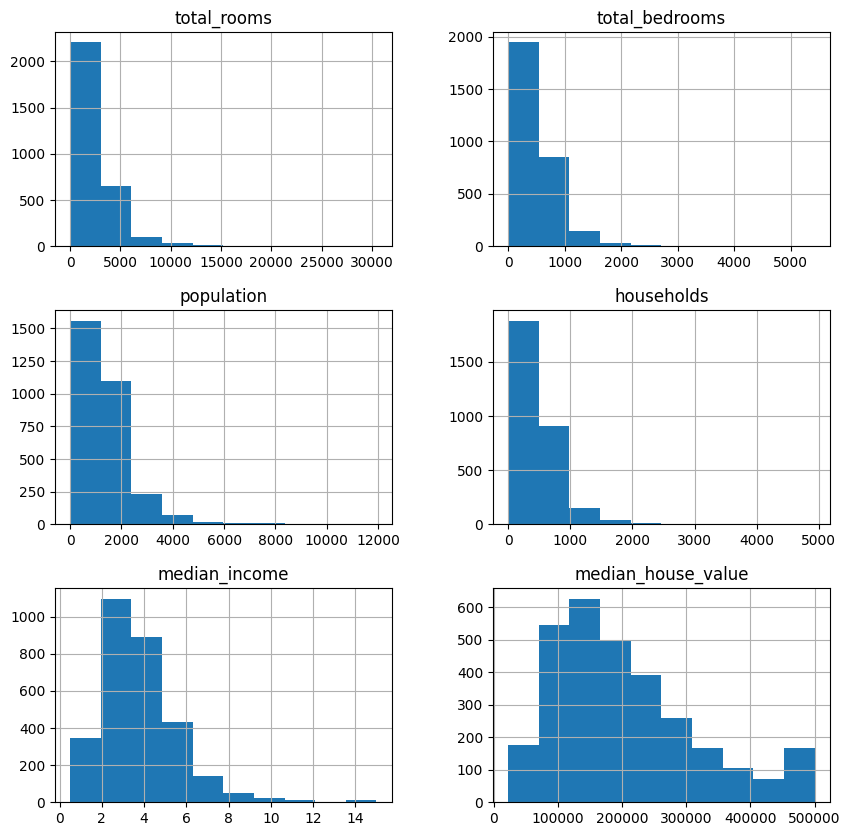

In [10]:
viz = cdf
viz.hist(bins=10,figsize=(10,10))
plt.show()

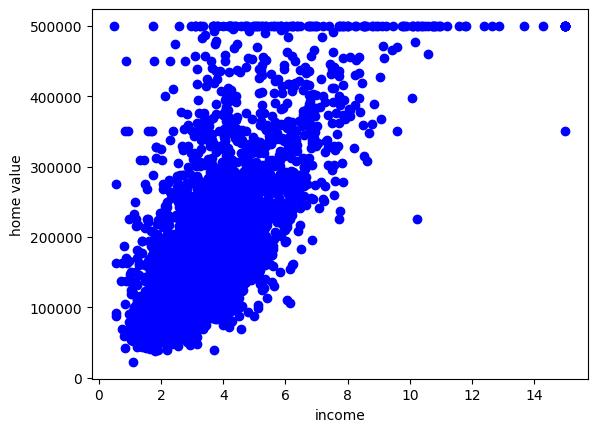

In [12]:
plt.scatter(cdf.median_income, cdf.median_house_value,  color='blue')
plt.xlabel("income")
plt.ylabel("home value")
plt.show()

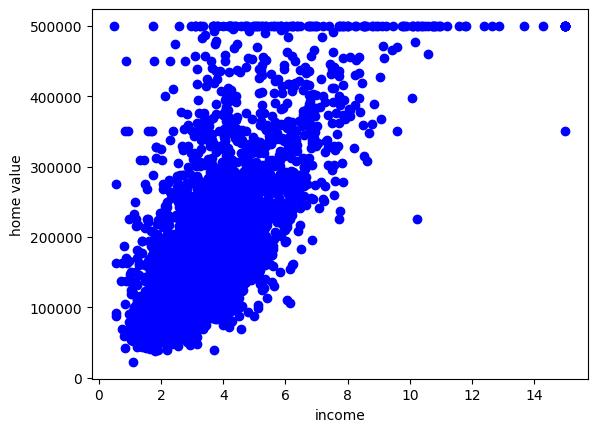

In [13]:
X = cdf.median_income.to_numpy()
y = cdf.median_house_value.to_numpy()
plt.scatter(X, y,  color='blue')
plt.xlabel("income")
plt.ylabel("home value")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (2400,), (2400,))

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

print(regressor.intercept_)
print(regressor.coef_)

50847.821195044846
[40940.61285055]


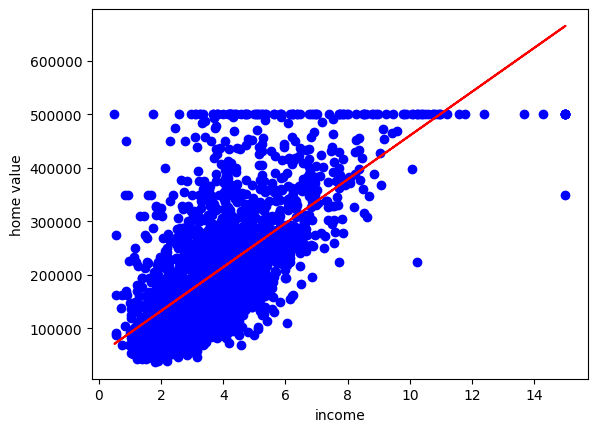

In [17]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("income")
plt.ylabel("home value")
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 60123.48
Mean squared error: 6355701945.13
Root mean squared error: 79722.66
R2-score: -0.03


Text(0, 0.5, 'home value')

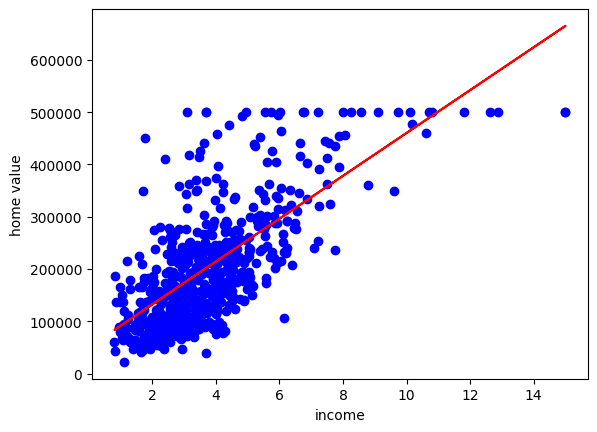

In [19]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("income")
plt.ylabel("home value")